## Topic: Algorithmic Triad: XGBoost, Deep Q Network, and LSTM Synergise for Optimizing Financial Risk Management and Investment Strategies in the Era of Big Data, Artificial Intelligence, and Cloud Computing

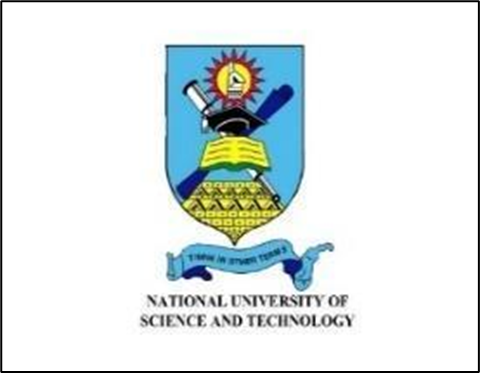






#### Faculty of Applied Sciences

### Submitted by

### Tafadzwa RJ Mheuka

### N02212644N

### Supervisor:

### Dr Sibonile Moyo


# EXPLORATORY DATA ANALYSIS

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of tickers
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN',  
    'MTD', 'NOW', 'ADBE', 'CRM', 'ASML', 'ORCL', 'SAP', 'INTU', 'HPE', 'IBM',  # Various tech stocks
    'WMT', 'COST', 'TGT', 'AMT', 'SPG', 'PLD', 'CBRE', 'EQIX', 'WY', 'AVB', 'O', 'CCI',  # Retail, real estate, and REITs
    'JPM', 'BAC', 'WFC', 'GS', 'MS', 'BLK', 'SCHW', 'AXP', 'CME', 'MMC', 'SPGI', 'AIG',  # Financial services
    'MMM', 'CAT', 'HON', 'DHR', 'UNP', 'UPS', 'RTX', 'BA', 'LMT', 'GD', 'NOC', 'RSG',  # Industrial and defense
    'CVX', 'XOM', 'COP', 'SLB', 'PSX', 'MPC', 'VLO', 'KMI', 'EPD', 'TRP', 'PXD', 'OXY',  # Energy and oil companies
    'JNJ', 'PFE', 'MRK', 'ABBV', 'GSK', 'NVS', 'SNY', 'AMGN', 'LLY', 'AZN', 'BIIB', 'TMO',  # Pharma and healthcare
    'PG', 'KO', 'PEP', 'UL', 'MO', 'MDLZ', 'CL', 'KHC', 'CLX', 'GIS', 'KMB', 'K',  # Consumer goods and food
    'UNH', 'CI', 'HUM', 'CVS', 'HCA', 'SYK', 'BDX', 'TMO', 'ISRG', 'ILMN', 'VRTX',  # Healthcare and medical devices
    'DHR', 'AAPL', 'ADBE', 'GOOGL', 'AMZN', 'INTC', 'MSFT', 'CSCO', 'QCOM', 'NVDA',  # Tech companies
    'SHOP', 'TSLA', 'META', 'NFLX', 'PYPL', 'UBER', 'X', 'SQ', 'SNAP', 'ROKU', 'ZM', 'DOCU',  # More tech companies
]

# Define start and end dates
start_date = '2019-01-01'
end_date = '2024-01-01'

# Download data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display first few rows of the data
print(data.head())

[*********************100%%**********************]  111 of 112 completed

1 Failed download:
['BA']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))


Ticker           AAPL       ABBV        ADBE        AIG        AMGN  \
Date                                                                  
2019-01-02  37.793781  69.330460  224.570007  34.318047  162.268112   
2019-01-03  34.029243  67.046112  215.699997  33.564461  159.798996   
2019-01-04  35.481930  69.206154  226.190002  34.803108  165.261459   
2019-01-07  35.402950  70.216248  229.259995  35.002327  167.485382   
2019-01-08  36.077843  70.542572  232.679993  35.140915  169.633163   

Ticker             AMT       AMZN        ASML         AVB        AXP  ...  \
Date                                                                  ...   
2019-01-02  138.415466  76.956497  147.658981  141.322739  88.524521  ...   
2019-01-03  139.245544  75.014000  139.515518  141.990921  86.796562  ...   
2019-01-04  139.801926  78.769501  145.552246  142.993179  90.707649  ...   
2019-01-07  140.667343  81.475502  148.877609  142.592239  91.200012  ...   
2019-01-08  142.256897  82.829002  147.7

In [2]:
# Perform EDA
# Summary statistics
summary_stats = data.describe()
# Save to Excel
summary_stats.to_excel("summary_statistics_prices.xlsx")

[*********************100%%**********************]  111 of 112 completed

In [3]:
# Perform EDA
# Summary statistics aggregated
print("Aggregate Summary Statistics:")
print(data.describe().agg(['mean', 'std', 'min', '25%', '50%', '75%', 'max']))


Aggregate Summary Statistics:
Ticker         AAPL         ABBV         ADBE          AIG         AMGN  \
mean     252.857881   239.642828   494.004085   192.972938   320.505418   
std      409.914337   413.645223   354.726415   430.748765   386.085826   
min       34.029243    32.850876   115.398594    11.047789    30.518123   
25%       75.192888    73.084230   326.987495    39.339193   195.069901   
50%      132.309372    99.651089   419.380005    48.496046   213.392952   
75%      157.797318   137.917824   504.722496    55.554791   228.811226   
max     1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   

Ticker          AMT         AMZN         ASML          AVB          AXP  ...  \
mean     318.472222   257.388053   551.618753   290.574271   261.527475  ...   
std      386.914430   407.175432   373.598465   395.998681   405.963585  ...   
min       29.366093    31.209475   139.515518    25.902612    29.372109  ...   
25%      188.802761    95.441999   285.087959   1

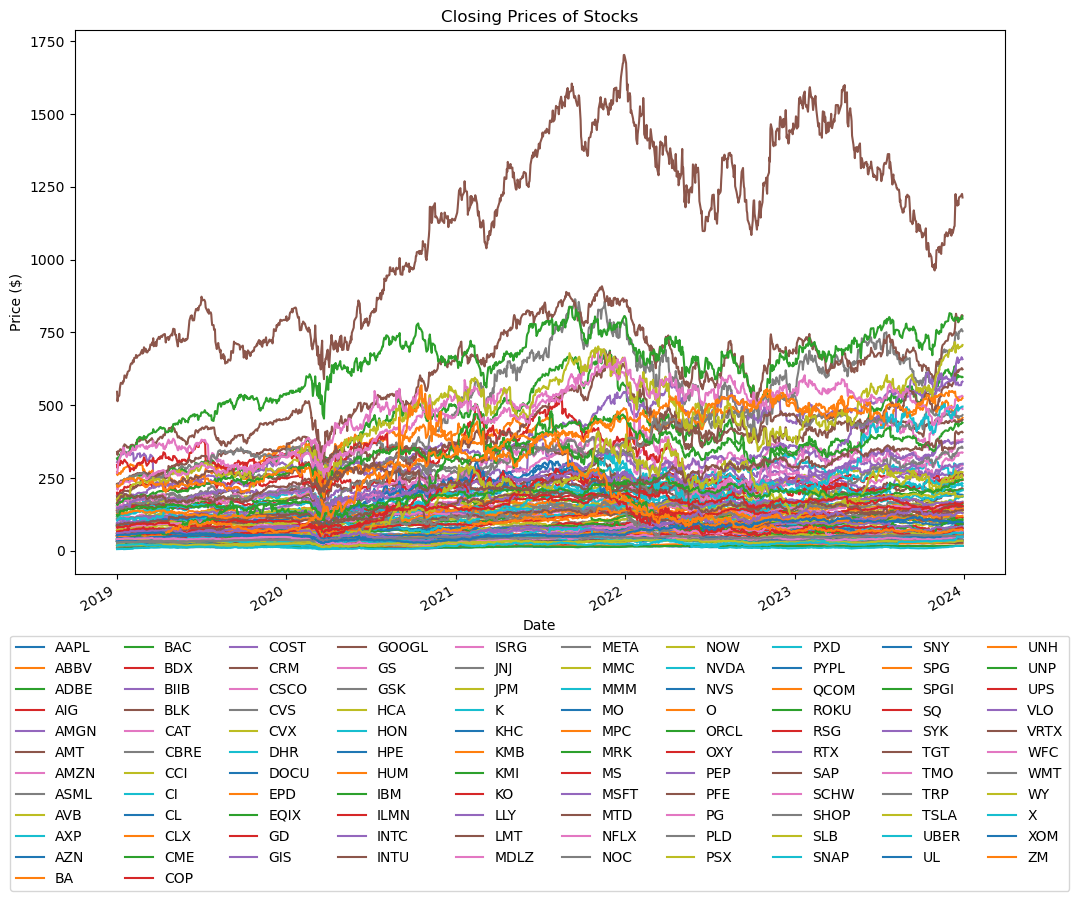

In [4]:
# Plotting closing prices
plt.figure(figsize=(12, 8))
data.plot(ax=plt.gca())  # Plot on the current axis
plt.title('Closing Prices of Stocks')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=10)  # Placing legend below the graph
plt.show()

In [5]:
returns = data.pct_change()


# Perform EDA on returns
# Summary statistics
returns_summary = returns.describe()
returns_summary.to_excel("returns_summary.xlsx")
print(returns_summary)

Ticker         AAPL         ABBV         ADBE          AIG         AMGN  \
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean       0.001500     0.000755     0.001048     0.000867     0.000571   
std        0.020306     0.016026     0.023195     0.025535     0.015947   
min       -0.128647    -0.162524    -0.167932    -0.208449    -0.082608   
25%       -0.008204    -0.006953    -0.010191    -0.009964    -0.007353   
50%        0.001423     0.001161     0.001733     0.001228    -0.000035   
75%        0.012431     0.008731     0.013235     0.012127     0.008169   
max        0.119808     0.087174     0.177193     0.188083     0.108977   

Ticker          AMT         AMZN         ASML          AVB          AXP  ...  \
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000  ...   
mean       0.000521     0.000787     0.001623     0.000390     0.000870  ...   
std        0.018694     0.022187     0.025462     0.018601     0.023804  ...   
min 

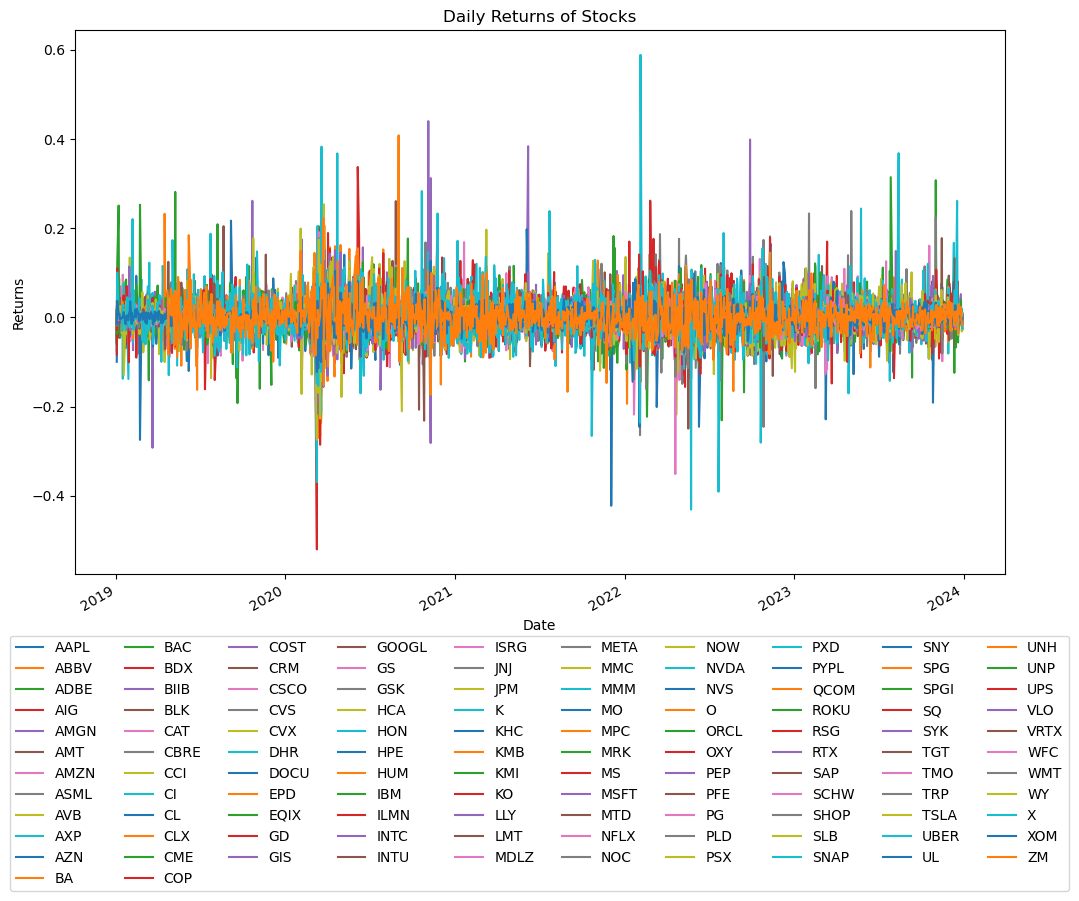

In [6]:
# Plotting returns
returns.plot(figsize=(12, 8))
plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=10)  # Placing legend below the graph
plt.show()

In [7]:
macro_data = pd.read_excel('macro_data.xlsx')
# Summary statistics
print("\nSummary Statistics Macroeconomic Data:")
macro_data.describe()



Summary Statistics Macroeconomic Data:


,Date,"Inflation, GDP deflator (annual %)",GDP per capita growth (annual %),"Unemployment, total (% of total labor force) (national estimate)",Adjusted net national income per capita (current US$)
count,16.000000,16.000000,16.000000,12.000000,15.000000
mean,2014.500000,3.732050,1.522582,5.836973,8456.709824
std,4.760952,1.981421,2.157722,0.387828,740.256860
min,2007.000000,1.910268,-4.037819,5.418361,7160.213923
25%,2010.750000,2.211829,1.494189,5.565426,8059.031594
50%,2014.500000,2.837967,1.846192,5.739220,8604.439708
75%,2018.250000,4.894865,2.235321,5.984753,8847.876758
max,2022.000000,7.850332,5.285317,6.676999,9747.652622


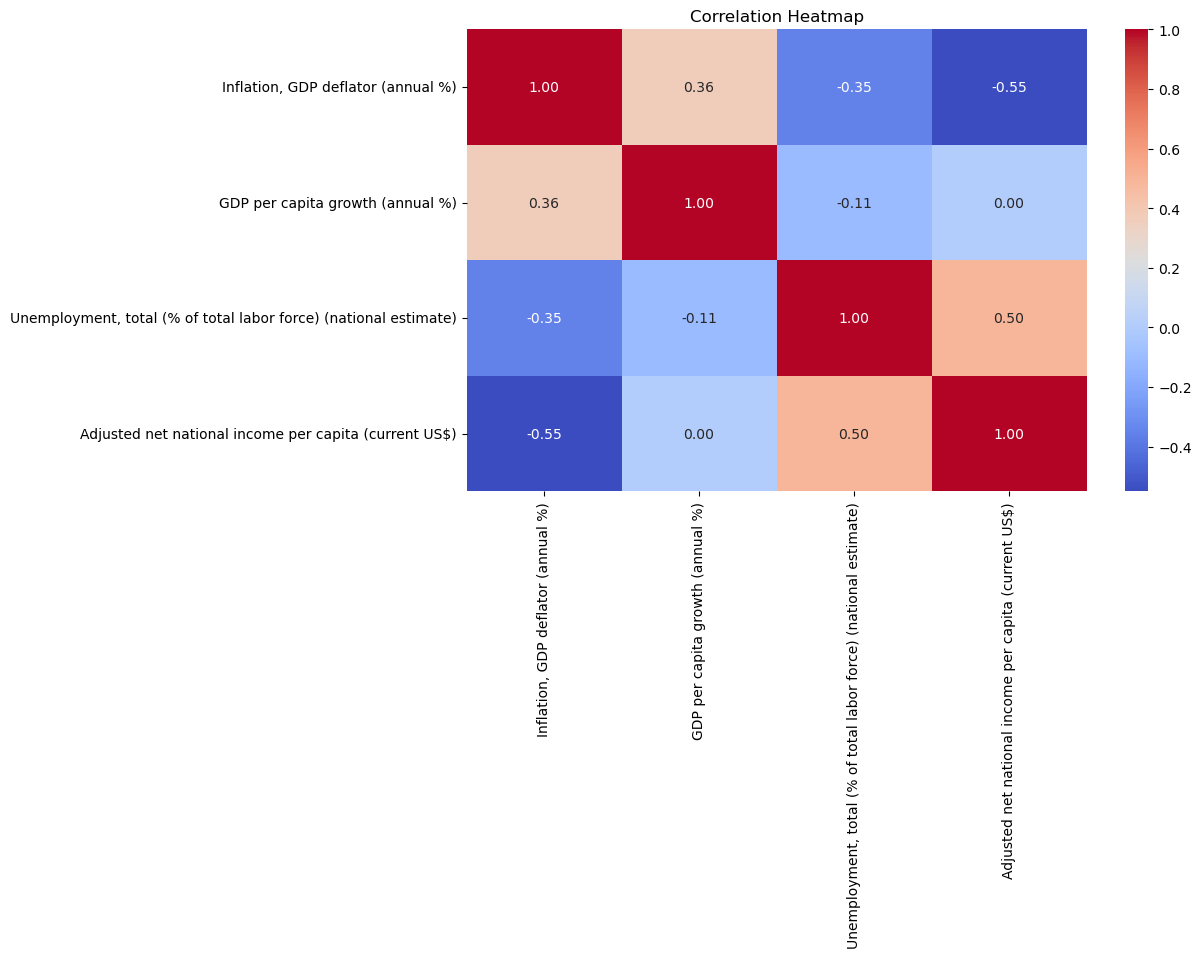

In [8]:
import seaborn as sns
# Drop 'Date' column as it's not required for heatmap
macro_data2 = macro_data.drop(columns=['Date']).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(macro_data2.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

DataFrame:
  Ticker Sentiment                                          Headlines
0   AAPL  Negative  [Google I/O 2024 – The AI battle will be fough...
1   MSFT  Negative  [Dow Jones Futures: Nvidia Soars But Stock Mar...
2  GOOGL  Positive  [Itochu unit signs renewable energy agreement ...
3   AMZN  Positive  [Insider Sale: Senior Vice President David Zap...
4    MTD   Neutral  [Zacks Industry Outlook Highlights Mettler-Tol...

Missing Values:
Ticker       0
Sentiment    0
Headlines    0
dtype: int64


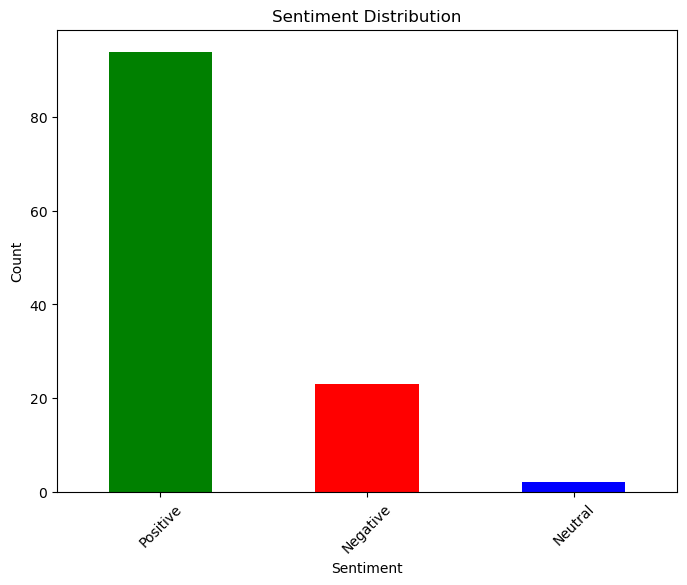

In [9]:
import pandas as pd
import yfinance as yf
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

class SentimentAnalysisModel:
    def __init__(self, tickers):
        self.tickers = tickers

    def download_news_and_analyze_sentiment(self):
        sid = SentimentIntensityAnalyzer()

        ticker_list = []
        sentiment_list = []
        headlines_list = []

        for ticker in self.tickers:
            ticker_data = yf.Ticker(ticker)
            news = ticker_data.news
            
            if news:
                headlines = [headline['title'] for headline in news]
                sentiments = [sid.polarity_scores(headline)['compound'] for headline in headlines]
                avg_sentiment = sum(sentiments) / len(sentiments)
                sentiment = "Positive" if avg_sentiment > 0 else "Negative" if avg_sentiment < 0 else "Neutral"
                
                ticker_list.append(ticker)
                sentiment_list.append(sentiment)
                headlines_list.append(headlines)
            else:
                ticker_list.append(ticker)
                sentiment_list.append("Not available")
                headlines_list.append([])

        df = pd.DataFrame({
            'Ticker': ticker_list,
            'Sentiment': sentiment_list,
            'Headlines': headlines_list
        })

        return df


# List of tickers
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN',

    'MTD', 'NOW', 'ADBE', 'CRM', 'ASML', 'ORCL', 'SAP', 'INTU', 'HPE', 'IBM',
    'WMT', 'COST', 'TGT', 'AMT', 'SPG', 'PLD', 'CBRE', 'EQIX', 'WY', 'AVB', 'O', 'CCI',
    'JPM', 'BAC', 'WFC', 'GS', 'MS', 'BLK', 'SCHW', 'AXP', 'CME', 'MMC', 'SPGI', 'AIG',
    'MMM', 'CAT', 'HON', 'DHR', 'UNP', 'UPS', 'RTX', 'BA', 'LMT', 'GD', 'NOC', 'RSG',
    'CVX', 'XOM', 'COP', 'SLB', 'PSX', 'MPC', 'VLO', 'KMI', 'EPD', 'TRP', 'PXD', 'OXY',
    'JNJ', 'PFE', 'MRK', 'ABBV', 'GSK', 'NVS', 'SNY', 'AMGN', 'LLY', 'AZN', 'BIIB', 'TMO',
    'PG', 'KO', 'PEP', 'UL', 'MO', 'MDLZ', 'CL', 'KHC', 'CLX', 'GIS', 'KMB', 'K',
    'UNH', 'CI', 'HUM', 'CVS', 'HCA', 'SYK', 'BDX', 'TMO', 'ISRG', 'ILMN', 'VRTX',
    'DHR', 'AAPL', 'ADBE', 'GOOGL', 'AMZN', 'INTC', 'MSFT', 'CSCO', 'QCOM', 'NVDA',
    'SHOP', 'TSLA', 'META', 'NFLX', 'PYPL', 'UBER', 'X', 'SQ', 'SNAP', 'ROKU', 'ZM', 'DOCU',
]

# Instantiate the SentimentAnalysisModel class with the list of tickers
sentiment_model = SentimentAnalysisModel(tickers)

# Download news headlines and analyze sentiment
sentiment_df = sentiment_model.download_news_and_analyze_sentiment()

# Display the first few rows of the DataFrame
print("DataFrame:")
print(sentiment_df.head())

# Check for missing values
print("\nMissing Values:")
print(sentiment_df.isnull().sum())

# Count the number of occurrences of each sentiment
sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


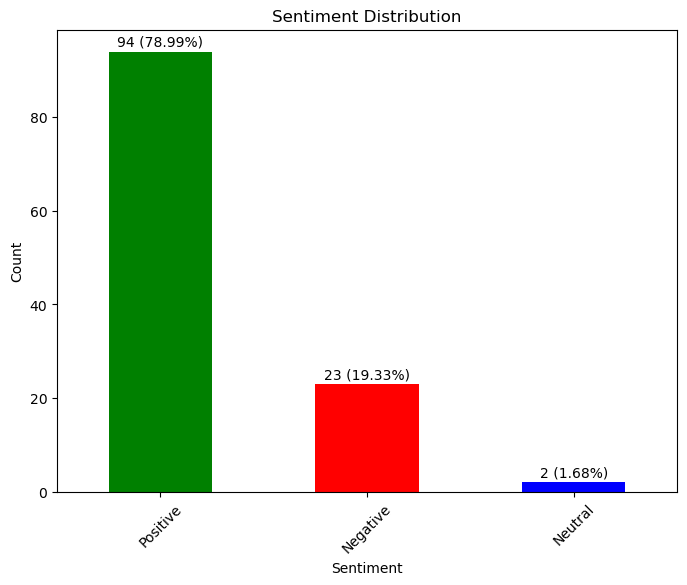

In [10]:
# Calculate percentages of each sentiment category
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plotting the sentiment distribution with percentages
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.5, f"{v} ({sentiment_percentages[i]:.2f}%)", ha='center', va='bottom')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

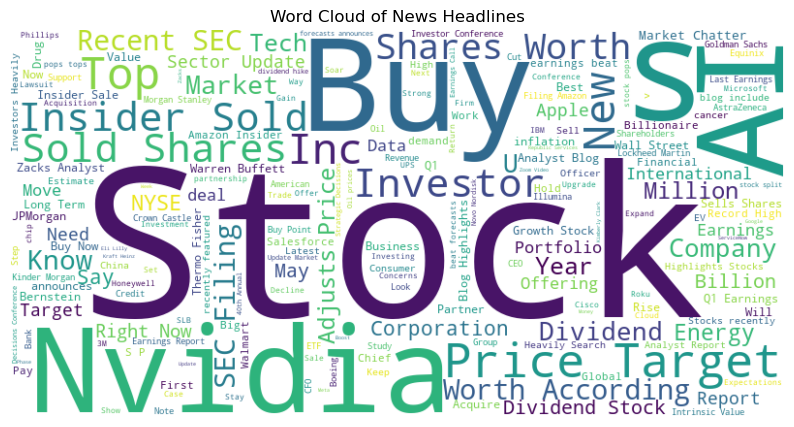

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all headlines into a single string
all_headlines = ' '.join(sentiment_df['Headlines'].sum())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of News Headlines')
plt.axis('off')
plt.show()


# RISK ASSESSMENT MODEL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Training Set Accuracy: 1.0
Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    162874
           1       1.00      1.00      1.00      3298

    accuracy                           1.00    166172
   macro avg       1.00      1.00      1.00    166172
weighted avg       1.00      1.00      1.00    166172

Training Set Confusion Matrix:
[[162874      0]
 [     0   3298]]

Validation Set Accuracy: 0.9998074330829964
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20367
           1       1.00      0.99      1.00       405

    accuracy                           1.00     20772
   macro avg       1.00      1.00      1.00     20772
weighted avg       1.00      1.00      1.00     20772

Validation Set Confusion Matrix:
[[20367     0]
 [    4   401]]

Testing Set Accuracy: 0.9997111496244945
Testing Set Classification R

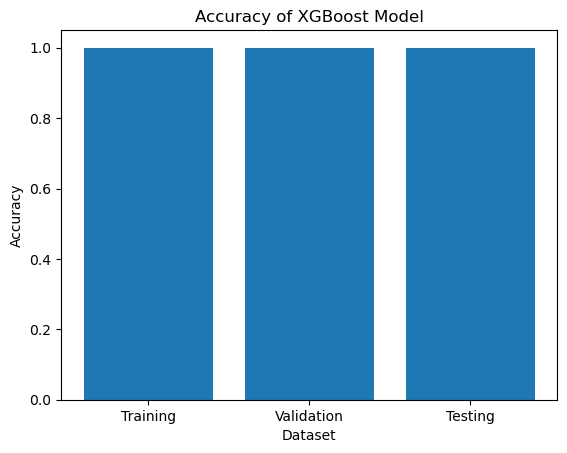

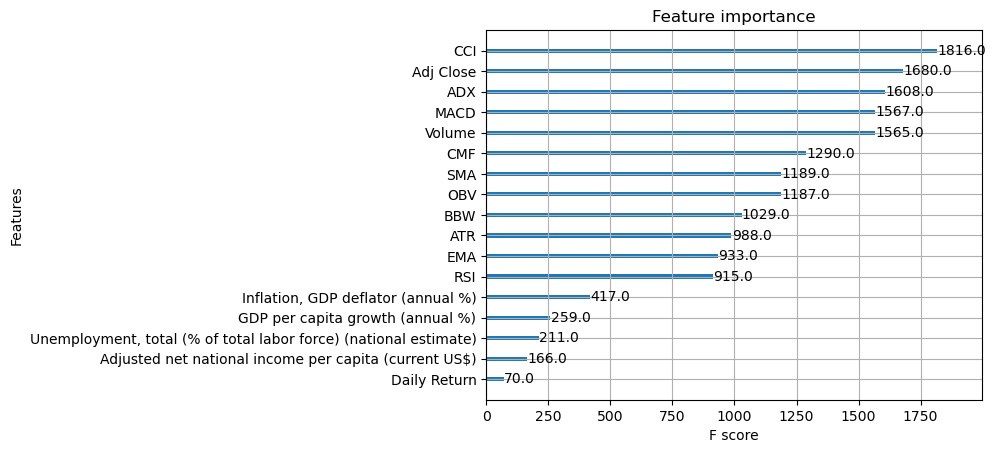

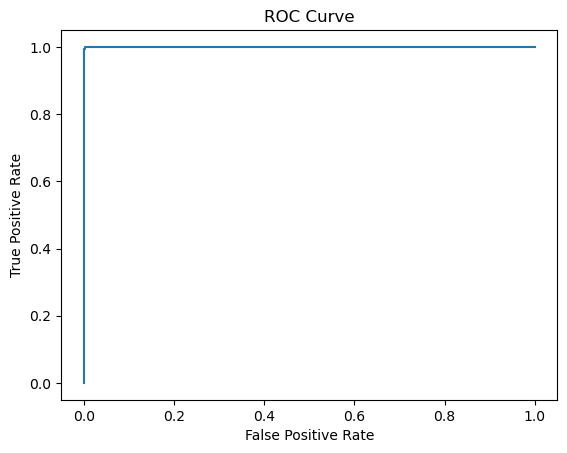

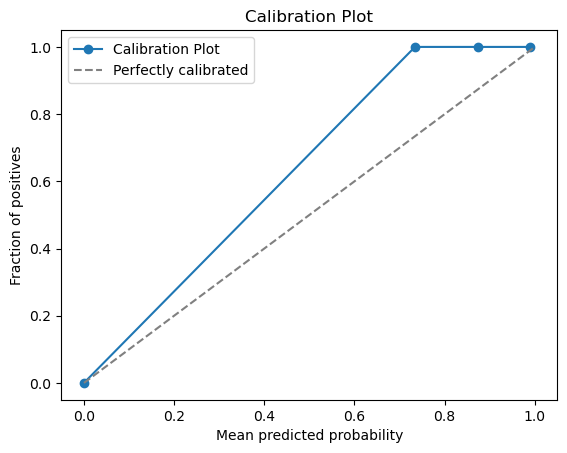

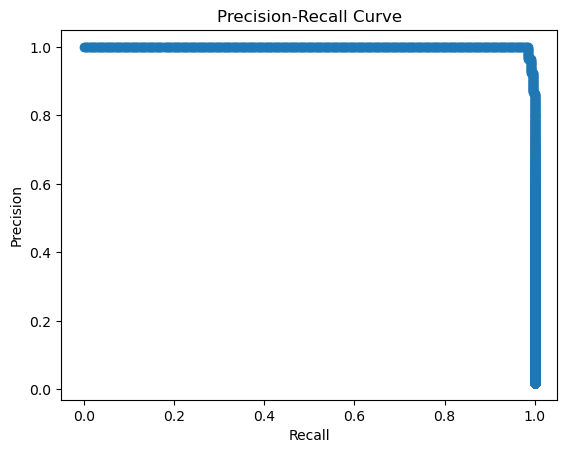

In [26]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.calibration import calibration_curve


class RiskAssessmentModel:
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        data = pd.DataFrame()
        for ticker in self.tickers:
            try:
                ticker_data = yf.download(ticker, start=self.start_date, end=self.end_date)
                if not ticker_data.empty:
                    ticker_data['Ticker'] = ticker  # Add a column with ticker name
                    ticker_data['Daily Return'] = ticker_data['Close'].pct_change() * 100  # Calculate daily return
                    data = pd.concat([data, ticker_data], axis=0)
            except Exception as e:
                print(f"Error downloading data for {ticker}: {e}")
        return data

    def add_technical_indicators(self, data):
        # Add technical indicators using the ta library
        data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'])
        data['BBW'] = ta.volatility.bollinger_mavg(data['Close']) / (
                    2 * ta.volatility.bollinger_lband(data['Close']) - 2 * ta.volatility.bollinger_hband(data['Close']))
        data['OBV'] = ta.volume.on_balance_volume(data['Close'], data['Volume'])
        data['CMF'] = ta.volume.chaikin_money_flow(data['High'], data['Low'], data['Close'], data['Volume'])
        data['MACD'] = ta.trend.macd(data['Close'])
        data['ADX'] = ta.trend.adx(data['High'], data['Low'], data['Close'])
        data['SMA'] = ta.trend.sma_indicator(data['Close'])
        data['EMA'] = ta.trend.ema_indicator(data['Close'])
        data['CCI'] = ta.trend.cci(data['High'], data['Low'], data['Close'])
        data['RSI'] = ta.momentum.rsi(data['Close'])
        return data

    def merge_data(self, stock_data, macro_data):
        merged_data = pd.merge(stock_data, macro_data, how='left', left_on=stock_data.index.year, right_on='Date')
        merged_data.drop(columns=['Date'], inplace=True)  # Drop duplicated columns ('Date')
        merged_data.fillna(0, inplace=True)  # Replace NaNs with 0
        return merged_data

    def prepare_data(self, merged_data):
        variance_return = merged_data['Daily Return'].var()
        risk_list = []
        for index, row in merged_data.iterrows():
            if row['Daily Return'] > variance_return:
                risk_list.append(1)  # High risk
            elif row['Daily Return'] < variance_return:
                risk_list.append(-1)  # Low risk
            else:
                risk_list.append(0)  # No significant risk
        merged_data['Risk_from_individual_return'] = risk_list
        merged_data['Risk_from_individual_return'] = merged_data['Risk_from_individual_return'].replace(-1, 0)
        return merged_data

    def train_model(self, X, Y):
        # Split the dataset into training, validation, and testing sets
        X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
        X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

        # Define the parameter grid for RandomizedSearchCV
        param_grid = {
            'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
            'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
            'min_child_weight': [1, 3, 5, 7],
            'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
            'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
        }

        # Initialize the XGBoost classifier
        xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

        # Perform RandomizedSearchCV for hyperparameter tuning
        xgb_random = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                                        n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        xgb_random.fit(X_train, Y_train)

        # Train the XGBoost model using the best parameters
        xgb_model = xgb_random.best_estimator_
        xgb_model.fit(X_train, Y_train)

        return xgb_model, X_train, Y_train, X_val, Y_val, X_test, Y_test

    def evaluate_model(self, model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
        # Evaluate the model performance on training set
        train_predictions = model.predict(X_train)
        print("Training Set Accuracy:", accuracy_score(Y_train, train_predictions))
        print("Training Set Classification Report:")
        print(classification_report(Y_train, train_predictions))
        print("Training Set Confusion Matrix:")
        print(confusion_matrix(Y_train, train_predictions))

        # Evaluate the model performance on validation set
        val_predictions = model.predict(X_val)
        print("\nValidation Set Accuracy:", accuracy_score(Y_val, val_predictions))
        print("Validation Set Classification Report:")
        print(classification_report(Y_val, val_predictions))
        print("Validation Set Confusion Matrix:")
        print(confusion_matrix(Y_val, val_predictions))

        # Evaluate the model performance on testing set
        test_predictions = model.predict(X_test)
        print("\nTesting Set Accuracy:", accuracy_score(Y_test, test_predictions))
        print("Testing Set Classification Report:")
        print(classification_report(Y_test, test_predictions))
        print("Testing Set Confusion Matrix:")
        print(confusion_matrix(Y_test, test_predictions))

        return train_predictions, val_predictions, test_predictions

    def plot_metrics(self, model, X_train, Y_train, X_val, Y_val, X_test, Y_test,
                     train_predictions, val_predictions, test_predictions):
        # Plot accuracy plot
        train_accuracy = accuracy_score(Y_train, train_predictions)
        val_accuracy = accuracy_score(Y_val, val_predictions)
        test_accuracy = accuracy_score(Y_test, test_predictions)

        plt.bar(['Training', 'Validation', 'Testing'], [train_accuracy, val_accuracy, test_accuracy])
        plt.title('Accuracy of XGBoost Model')
        plt.xlabel('Dataset')
        plt.ylabel('Accuracy')
        plt.show()

        # Plot feature importance
        xgb.plot_importance(model)
        plt.show()

        # Plot ROC curve
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()

        # Plot calibration curve
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        prob_true, prob_pred = calibration_curve(Y_test, y_pred_prob, n_bins=10, strategy='uniform')
        plt.plot(prob_pred, prob_true, marker='o', label='Calibration Plot')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
        plt.xlabel('Mean predicted probability')
        plt.ylabel('Fraction of positives')
        plt.title('Calibration Plot')
        plt.legend()
        plt.show()

        # Plot precision-recall curve
        precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob)
        plt.plot(recall, precision, marker='o')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

    def risk_assessment_pipeline(self):
        # Download data for tickers
        stock_data = self.download_data()

        # Save the stock data to an Excel file
        stock_data.to_excel("stock_data.xlsx", index=False)

        # Add technical indicators to the stock data
        stock_data_with_indicators = self.add_technical_indicators(stock_data)

        # Download and preprocess macroeconomic data
        macro_data = pd.read_excel('macro_data.xlsx')
        macro_data = macro_data.fillna(0)

        # Merge stock data with macroeconomic data
        merged_data = self.merge_data(stock_data_with_indicators, macro_data)

        # Save the merged data to an Excel file
        merged_data.to_excel("merged_data.xlsx", index=False)

        # Prepare data for training
        prepared_data = self.prepare_data(merged_data)

        # Save the prepared data to an Excel file
        prepared_data.to_excel("prepared_data.xlsx", index=False)

        # Define features (X) and target variable (Y)
        X = prepared_data[['Adj Close', 'Volume', 'Daily Return', 'ATR', 'BBW', 'OBV',
                           'CMF', 'MACD', 'ADX', 'SMA', 'EMA', 'CCI', 'RSI',
                           'Inflation, GDP deflator (annual %)', 'GDP per capita growth (annual %)',
                           'Unemployment, total (% of total labor force) (national estimate)',
                           'Adjusted net national income per capita (current US$)']]
        Y = prepared_data['Risk_from_individual_return']

        # Train the model
        model, X_train, Y_train, X_val, Y_val, X_test, Y_test = self.train_model(X, Y)

        # Evaluate the model
        train_predictions, val_predictions, test_predictions = self.evaluate_model(model, X_train, Y_train, X_val,
                                                                                    Y_val, X_test, Y_test)

        # Plot evaluation metrics
        self.plot_metrics(model, X_train, Y_train, X_val, Y_val, X_test, Y_test,
                          train_predictions, val_predictions, test_predictions)

        # Train the model
        xgb_model, _, _, _, _, _, _ = self.train_model(X, Y)  # Unpack the tuple and ignore other returned values

        # Make predictions on the entire dataset to obtain risk scores
        merged_data['Risk_Scores'] = xgb_model.predict_proba(X)[:, 1]

        # Define risk score threshold and classify risk levels
        risk_threshold = 0.5
        merged_data['Risk_Level'] = merged_data['Risk_Scores'].apply(
            lambda x: 'High Risk' if x >= risk_threshold else 'Low Risk')

        # Save the data to an Excel file
        merged_data.to_excel("stock_data_with_scores.xlsx", index=False)


# List of 100 tickers
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN',
    'MTD', 'NOW', 'ADBE', 'CRM', 'ASML', 'ORCL', 'SAP', 'INTU', 'HPE', 'IBM',  # Various tech stocks
    'WMT', 'COST', 'TGT', 'AMT', 'SPG', 'PLD', 'CBRE', 'EQIX', 'WY', 'AVB', 'O', 'CCI',  # Retail, real estate, and REITs
    'JPM', 'BAC', 'WFC', 'GS', 'MS', 'BLK', 'SCHW', 'AXP', 'CME', 'MMC', 'SPGI', 'AIG',  # Financial services
    'MMM', 'CAT', 'HON', 'DHR', 'UNP', 'UPS', 'RTX', 'BA', 'LMT', 'GD', 'NOC', 'RSG',  # Industrial and defense
    'CVX', 'XOM', 'COP', 'SLB', 'PSX', 'MPC', 'VLO', 'KMI', 'EPD', 'TRP', 'PXD', 'OXY',  # Energy and oil companies
    'JNJ', 'PFE', 'MRK', 'ABBV', 'GSK', 'NVS', 'SNY', 'AMGN', 'LLY', 'AZN', 'BIIB', 'TMO',  # Pharma and healthcare
    'PG', 'KO', 'PEP', 'UL', 'MO', 'MDLZ', 'CL', 'KHC', 'CLX', 'GIS', 'KMB', 'K',  # Consumer goods and food
    'UNH', 'CI', 'HUM', 'CVS', 'HCA', 'SYK', 'BDX', 'TMO', 'ISRG', 'ILMN', 'VRTX',  # Healthcare and medical devices
    'DHR', 'AAPL', 'ADBE', 'GOOGL', 'AMZN', 'INTC', 'MSFT', 'CSCO', 'QCOM', 'NVDA',  # Tech companies
    'SHOP', 'TSLA', 'META', 'NFLX', 'PYPL', 'UBER', 'X', 'SQ', 'SNAP', 'ROKU', 'ZM', 'DOCU',  # More tech companies
]

# Define start and end dates
start_date = '2017-01-01'
end_date = '2024-01-01'

# Instantiate the RiskAssessmentModel
risk_assessment_model = RiskAssessmentModel(tickers, start_date, end_date)

# Execute the risk assessment pipeline
risk_assessment_model.risk_assessment_pipeline()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[0]	validation_0-logloss:0.18701
[1]	validation_0-logloss:0.17322
[2]	validation_0-logloss:0.16885
[3]	validation_0-logloss:0.16444
[4]	validation_0-logloss:0.16066
[5]	validation_0-logloss:0.15671
[6]	validation_0-logloss:0.15346
[7]	validation_0-logloss:0.14232
[8]	validation_0-logloss:0.13270
[9]	validation_0-logloss:0.12416
[10]	validation_0-logloss:0.11646
[11]	validation_0-logloss:0.10945
[12]	validation_0-logloss:0.10303
[13]	validation_0-logloss:0.09711
[14]	validation_0-logloss:0.09161
[15]	validation_0-logloss:0.08650
[16]	validation_0-logloss:0.08450
[17]	validation_0-logloss:0.07982
[18]	validation_0-logloss:0.07804
[19]	validation_0-logloss:0.07649
[20]	validation_0-logloss:0.07510
[21]	validation_0-logloss:0.07350
[22]	validation_0-logloss:0.07206
[23]	validation_0-logloss:0.07074
[24]	validation_0-logloss:0.06968
[25]	validation_0-logloss:0.06857
[26]	validation_0-logloss:0.06471
[27]	validation_0-logloss:0.06110
[28]	validation_0-logloss:0.06015
[29]	validation_0-loglos

C:\Users\tmheuka\AppData\Local\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.04905
[38]	validation_0-logloss:0.04842
[39]	validation_0-logloss:0.04781
[40]	validation_0-logloss:0.04725
[41]	validation_0-logloss:0.04669
[42]	validation_0-logloss:0.04609
[43]	validation_0-logloss:0.04557
[44]	validation_0-logloss:0.04530
[45]	validation_0-logloss:0.04482
[46]	validation_0-logloss:0.04434
[47]	validation_0-logloss:0.04185
[48]	validation_0-logloss:0.04138
[49]	validation_0-logloss:0.04098
[50]	validation_0-logloss:0.04063
[51]	validation_0-logloss:0.04033
[52]	validation_0-logloss:0.04014
[53]	validation_0-logloss:0.03791
[54]	validation_0-logloss:0.03765
[55]	validation_0-logloss:0.03725
[56]	validation_0-logloss:0.03693
[57]	validation_0-logloss:0.03489
[58]	validation_0-logloss:0.03451
[59]	validation_0-logloss:0.03432
[60]	validation_0-logloss:0.03395
[61]	validation_0-logloss:0.03361
[62]	validation_0-logloss:0.03323
[63]	validation_0-logloss:0.03298
[64]	validation_0-logloss:0.03118
[65]	validation_0-logloss:0.03096
[66]	validatio

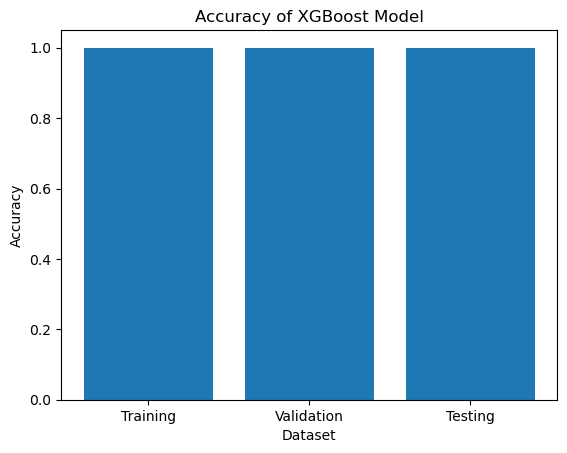

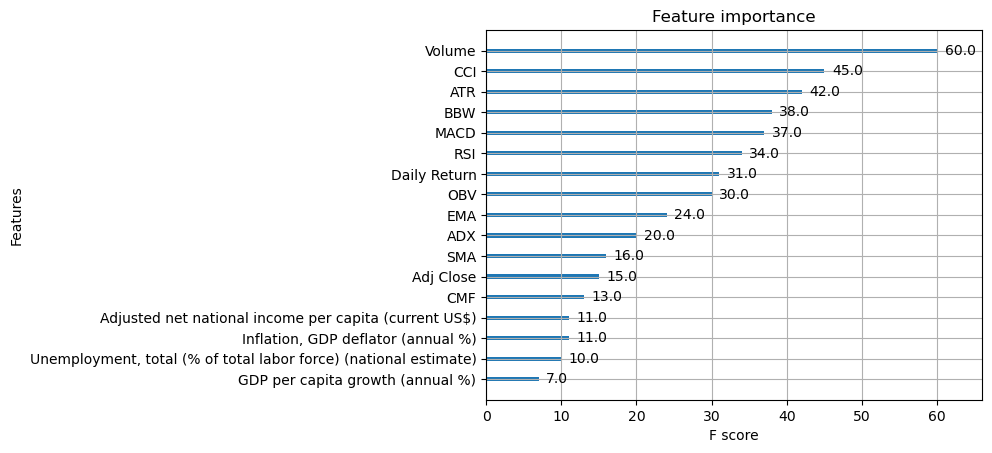

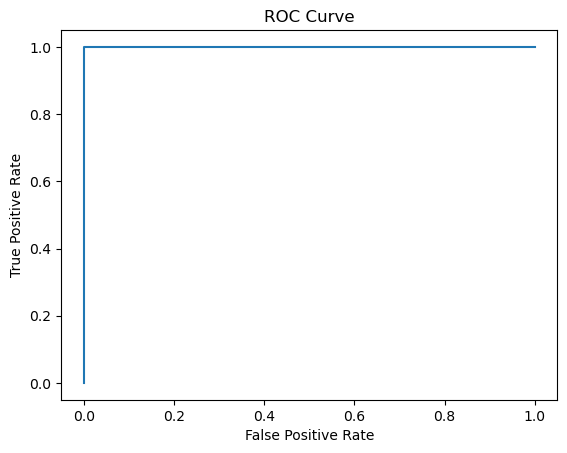

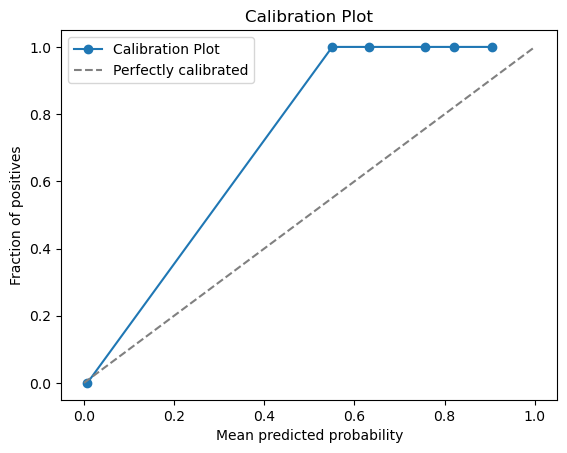

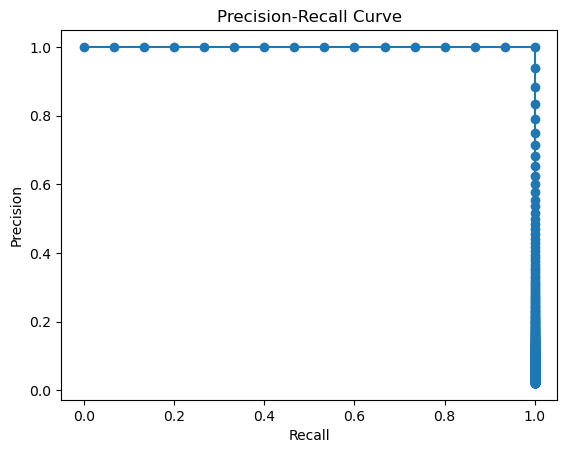

[0]	validation_0-logloss:0.18701
[1]	validation_0-logloss:0.17322
[2]	validation_0-logloss:0.16885
[3]	validation_0-logloss:0.16444
[4]	validation_0-logloss:0.16066
[5]	validation_0-logloss:0.15671
[6]	validation_0-logloss:0.15346
[7]	validation_0-logloss:0.14232
[8]	validation_0-logloss:0.13270
[9]	validation_0-logloss:0.12416
[10]	validation_0-logloss:0.11646
[11]	validation_0-logloss:0.10945
[12]	validation_0-logloss:0.10303
[13]	validation_0-logloss:0.09711
[14]	validation_0-logloss:0.09161
[15]	validation_0-logloss:0.08650
[16]	validation_0-logloss:0.08450
[17]	validation_0-logloss:0.07982
[18]	validation_0-logloss:0.07804
[19]	validation_0-logloss:0.07649
[20]	validation_0-logloss:0.07510
[21]	validation_0-logloss:0.07350
[22]	validation_0-logloss:0.07206
[23]	validation_0-logloss:0.07074
[24]	validation_0-logloss:0.06968
[25]	validation_0-logloss:0.06857
[26]	validation_0-logloss:0.06471
[27]	validation_0-logloss:0.06110
[28]	validation_0-logloss:0.06015
[29]	validation_0-loglos

C:\Users\tmheuka\AppData\Local\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.04781
[40]	validation_0-logloss:0.04725
[41]	validation_0-logloss:0.04669
[42]	validation_0-logloss:0.04609
[43]	validation_0-logloss:0.04557
[44]	validation_0-logloss:0.04530
[45]	validation_0-logloss:0.04482
[46]	validation_0-logloss:0.04434
[47]	validation_0-logloss:0.04185
[48]	validation_0-logloss:0.04138
[49]	validation_0-logloss:0.04098
[50]	validation_0-logloss:0.04063
[51]	validation_0-logloss:0.04033
[52]	validation_0-logloss:0.04014
[53]	validation_0-logloss:0.03791
[54]	validation_0-logloss:0.03765
[55]	validation_0-logloss:0.03725
[56]	validation_0-logloss:0.03693
[57]	validation_0-logloss:0.03489
[58]	validation_0-logloss:0.03451
[59]	validation_0-logloss:0.03432
[60]	validation_0-logloss:0.03395
[61]	validation_0-logloss:0.03361
[62]	validation_0-logloss:0.03323
[63]	validation_0-logloss:0.03298
[64]	validation_0-logloss:0.03118
[65]	validation_0-logloss:0.03096
[66]	validation_0-logloss:0.03071
[67]	validation_0-logloss:0.03050
[68]	validatio

In [14]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.calibration import calibration_curve


class RiskAssessmentModel:
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        data = pd.DataFrame()
        for ticker in self.tickers:
            try:
                ticker_data = yf.download(ticker, start=self.start_date, end=self.end_date)
                if not ticker_data.empty:
                    ticker_data['Ticker'] = ticker
                    ticker_data['Daily Return'] = ticker_data['Close'].pct_change() * 100
                    data = pd.concat([data, ticker_data], axis=0)
            except Exception as e:
                print(f"Error downloading data for {ticker}: {e}")
        return data

    def add_technical_indicators(self, data):
        data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'])
        data['BBW'] = ta.volatility.bollinger_mavg(data['Close']) / (
                    2 * ta.volatility.bollinger_lband(data['Close']) - 2 * ta.volatility.bollinger_hband(data['Close']))
        data['OBV'] = ta.volume.on_balance_volume(data['Close'], data['Volume'])
        data['CMF'] = ta.volume.chaikin_money_flow(data['High'], data['Low'], data['Close'], data['Volume'])
        data['MACD'] = ta.trend.macd(data['Close'])
        data['ADX'] = ta.trend.adx(data['High'], data['Low'], data['Close'])
        data['SMA'] = ta.trend.sma_indicator(data['Close'])
        data['EMA'] = ta.trend.ema_indicator(data['Close'])
        data['CCI'] = ta.trend.cci(data['High'], data['Low'], data['Close'])
        data['RSI'] = ta.momentum.rsi(data['Close'])
        return data

    def merge_data(self, stock_data, macro_data):
        merged_data = pd.merge(stock_data, macro_data, how='left', left_on=stock_data.index.year, right_on='Date')
        merged_data.drop(columns=['Date'], inplace=True)
        merged_data.fillna(0, inplace=True)
        return merged_data

    def prepare_data(self, merged_data):
        variance_return = merged_data['Daily Return'].var()
        risk_list = []
        for index, row in merged_data.iterrows():
            if row['Daily Return'] > variance_return:
                risk_list.append(1)
            elif row['Daily Return'] < variance_return:
                risk_list.append(-1)
            else:
                risk_list.append(0)
        merged_data['Risk_from_individual_return'] = risk_list
        merged_data['Risk_from_individual_return'] = merged_data['Risk_from_individual_return'].replace(-1, 0)
        return merged_data

    def train_model(self, X, Y):
        X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
        X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1, 0.15],
            'max_depth': [3, 4, 5, 6],
            'min_child_weight': [1, 3, 5],
            'gamma': [0.0, 0.1, 0.2],
            'colsample_bytree': [0.3, 0.5, 0.7],
            'subsample': [0.6, 0.8, 1.0],
            'reg_alpha': [0.0, 0.1, 0.5],
            'reg_lambda': [1.0, 1.5, 2.0]
        }

        xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

        grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, Y_train)

        xgb_model = grid_search.best_estimator_
        xgb_model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)], early_stopping_rounds=10, verbose=True)

        return xgb_model, X_train, Y_train, X_val, Y_val, X_test, Y_test

    def evaluate_model(self, model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
        train_predictions = model.predict(X_train)
        print("Training Set Accuracy:", accuracy_score(Y_train, train_predictions))
        print("Training Set Classification Report:")
        print(classification_report(Y_train, train_predictions))
        print("Training Set Confusion Matrix:")
        print(confusion_matrix(Y_train, train_predictions))

        val_predictions = model.predict(X_val)
        print("\nValidation Set Accuracy:", accuracy_score(Y_val, val_predictions))
        print("Validation Set Classification Report:")
        print(classification_report(Y_val, val_predictions))
        print("Validation Set Confusion Matrix:")
        print(confusion_matrix(Y_val, val_predictions))

        test_predictions = model.predict(X_test)
        print("\nTesting Set Accuracy:", accuracy_score(Y_test, test_predictions))
        print("Testing Set Classification Report:")
        print(classification_report(Y_test, test_predictions))
        print("Testing Set Confusion Matrix:")
        print(confusion_matrix(Y_test, test_predictions))

        return train_predictions, val_predictions, test_predictions

    def plot_metrics(self, model, X_train, Y_train, X_val, Y_val, X_test, Y_test,
                     train_predictions, val_predictions, test_predictions):
        train_accuracy = accuracy_score(Y_train, train_predictions)
        val_accuracy = accuracy_score(Y_val, val_predictions)
        test_accuracy = accuracy_score(Y_test, test_predictions)

        plt.bar(['Training', 'Validation', 'Testing'], [train_accuracy, val_accuracy, test_accuracy])
        plt.title('Accuracy of XGBoost Model')
        plt.xlabel('Dataset')
        plt.ylabel('Accuracy')
        plt.show()

        xgb.plot_importance(model)
        plt.show()

        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()

        prob_true, prob_pred = calibration_curve(Y_test, y_pred_prob, n_bins=10, strategy='uniform')
        plt.plot(prob_pred, prob_true, marker='o', label='Calibration Plot')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
        plt.xlabel('Mean predicted probability')
        plt.ylabel('Fraction of positives')
        plt.title('Calibration Plot')
        plt.legend()
        plt.show()

        precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob)
        plt.plot(recall, precision, marker='o')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

    def risk_assessment_pipeline(self):
        stock_data = self.download_data()
        stock_data.to_excel("stock_data.xlsx", index=False)
        stock_data_with_indicators = self.add_technical_indicators(stock_data)
        macro_data = pd.read_excel('macro_data.xlsx')
        macro_data = macro_data.fillna(0)
        merged_data = self.merge_data(stock_data_with_indicators, macro_data)
        merged_data.to_excel("merged_data.xlsx", index=False)
        prepared_data = self.prepare_data(merged_data)
        prepared_data.to_excel("prepared_data.xlsx", index=False)

        X = prepared_data[['Adj Close', 'Volume', 'Daily Return', 'ATR', 'BBW', 'OBV',
                           'CMF', 'MACD', 'ADX', 'SMA', 'EMA', 'CCI', 'RSI',
                           'Inflation, GDP deflator (annual %)', 'GDP per capita growth (annual %)',
                           'Unemployment, total (% of total labor force) (national estimate)',
                           'Adjusted net national income per capita (current US$)']]
        Y = prepared_data['Risk_from_individual_return']

        model, X_train, Y_train, X_val, Y_val, X_test, Y_test = self.train_model(X, Y)
        train_predictions, val_predictions, test_predictions = self.evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)
        self.plot_metrics(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, train_predictions, val_predictions, test_predictions)

        xgb_model, _, _, _, _, _, _ = self.train_model(X, Y)
        xgb_model.save_model('risk_assessment_model.json')


# Define the tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Use fewer tickers for simplicity
start_date = '2017-01-01'
end_date = '2024-01-01'

# Instantiate and run the RiskAssessmentModel
risk_assessment_model = RiskAssessmentModel(tickers, start_date, end_date)
risk_assessment_model.risk_assessment_pipeline()


# PORTFOLIO OPTIMIZATION BEFORE SENTIMENT ADJUSTMENT

Top 5 Stocks in the Portfolio: ['GSK' 'CAT' 'TSLA' 'MRK' 'LMT']
Buy Strategy:
Buy 19.66% of GSK
Buy 20.03% of TSLA
Buy 20.20% of MRK
Buy 20.25% of LMT
Sell Strategy:
Portfolio Returns: 0.9971250186446486
Portfolio Volatility: 6.362378079915134
Portfolio Shape Ratio: 0.07739414367351963


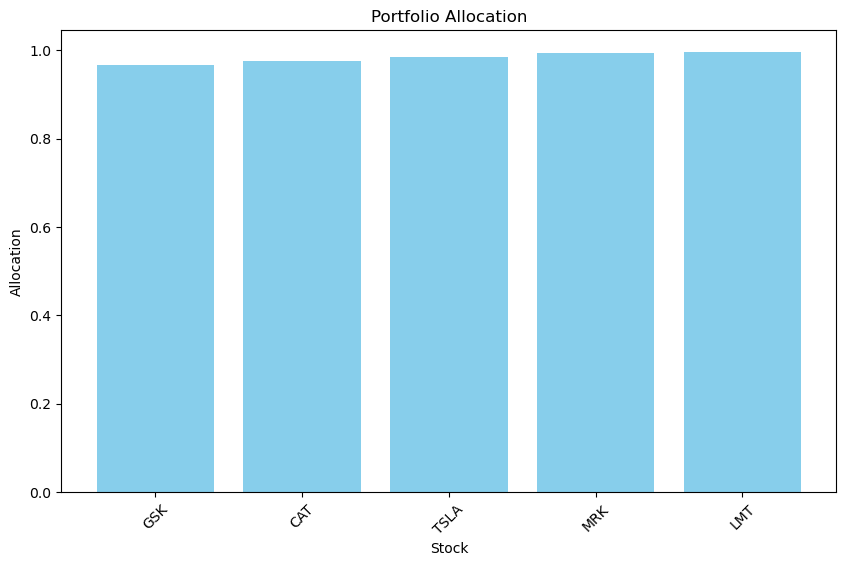

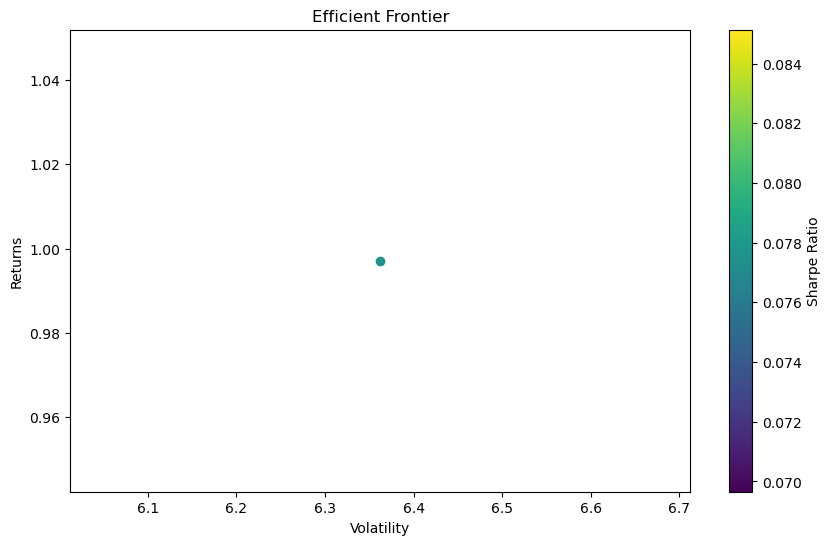

Interpretation based on standard thresholds:
Volatility is above the threshold.
Sharpe ratio is below the threshold.
Overview of Portfolio:
Drawbacks: Low Sharpe ratio.
Drawbacks: High volatility.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('stock_data_with_scores.xlsx')
df = df.groupby('Ticker').agg({'Daily Return': 'mean', 'Risk_Scores': 'mean'}).reset_index()
# Normalize features
df['Daily Return'] = (df['Daily Return'] - df['Daily Return'].mean()) / df['Daily Return'].std()
df['Risk_Scores'] = (df['Risk_Scores'] - df['Risk_Scores'].mean()) / df['Risk_Scores'].std()

# Define an RL environment
class PortfolioEnvironment:
    def __init__(self, data):
        self.data = data
        self.action_space = len(data)
        self.state = np.zeros(len(data))
        self.portfolio_returns = []
        self.portfolio_volatility = []
        self.portfolio_shape_ratio = []

    def reset(self):
        self.state = np.zeros(len(data))
        self.portfolio_returns = []
        self.portfolio_volatility = []
        self.portfolio_shape_ratio = []
        return self.state

    def step(self, action):
        self.state = action
        returns = np.dot(action, self.data['Daily Return'])
        volatility = np.sqrt(np.dot(action**2, self.data['Risk_Scores']**2))
        shape_ratio = returns / volatility
        if returns < 0:  # Ensure returns are not negative
            returns = 0
        self.portfolio_returns.append(returns)
        self.portfolio_volatility.append(volatility)
        self.portfolio_shape_ratio.append(shape_ratio)
        reward = shape_ratio
        done = len(self.portfolio_returns) >= 5  # Maximum of 5 stocks
        return self.state, reward, done, {}

    def get_portfolio_metrics(self):
        return np.mean(self.portfolio_returns), np.mean(self.portfolio_volatility), np.mean(self.portfolio_shape_ratio)

# Define RL environment
env = PortfolioEnvironment(df)

# Training loop (random policy for demonstration)
state = env.reset()
for _ in range(1000):  # Train for 1000 episodes
    action = np.random.rand(len(df))  # Random policy
    next_state, reward, done, _ = env.step(action)
    if done:
        break

# Get top 5 stocks in the portfolio
top_5_indices = np.argsort(action)[-5:]
top_5_stocks = df.loc[top_5_indices]['Ticker'].values
print("Top 5 Stocks in the Portfolio:", top_5_stocks)

# Calculate total value of portfolio (initially set to 1 for simplicity)
total_value = 1.0

# Calculate the percentage of each stock in the portfolio
allocation_percentages = action[top_5_indices] / np.sum(action[top_5_indices])

# Buy and sell strategy based on volatility and Sharpe ratio thresholds for selected 5 stocks
volatility_threshold = np.percentile(env.portfolio_volatility, 25)
sharpe_ratio_threshold = np.percentile(env.portfolio_shape_ratio, 75)

selected_stocks_action = action[top_5_indices]
selected_stocks_volatility = df['Risk_Scores'][top_5_indices]
selected_stocks_sharpe_ratio = df['Daily Return'][top_5_indices] / selected_stocks_volatility

buy_indices = np.where((selected_stocks_volatility < volatility_threshold) & (selected_stocks_sharpe_ratio > sharpe_ratio_threshold))[0]
sell_indices = np.where((selected_stocks_volatility > volatility_threshold) & (selected_stocks_sharpe_ratio < sharpe_ratio_threshold))[0]

print("Buy Strategy:")
for i in buy_indices:
    stock = df.loc[top_5_indices[i], 'Ticker']
    percentage_to_buy = allocation_percentages[i] * total_value
    print(f"Buy {percentage_to_buy:.2%} of {stock}")

print("Sell Strategy:")
for i in sell_indices:
    stock = df.loc[top_5_indices[i], 'Ticker']
    percentage_to_sell = allocation_percentages[i] * total_value
    print(f"Sell {percentage_to_sell:.2%} of {stock}")

# Print portfolio metrics
portfolio_returns, portfolio_volatility, portfolio_shape_ratio = env.get_portfolio_metrics()
print("Portfolio Returns:", portfolio_returns)  # Comment on returns
print("Portfolio Volatility:", portfolio_volatility)
print("Portfolio Shape Ratio:", portfolio_shape_ratio)

# Plot portfolio allocation
plt.figure(figsize=(10, 6))
plt.bar(df['Ticker'][top_5_indices], action[top_5_indices], color='skyblue')
plt.title('Portfolio Allocation')
plt.xlabel('Stock')
plt.ylabel('Allocation')
plt.xticks(rotation=45)
plt.show()

# Efficient frontier plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_shape_ratio, cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Interpretation based on standard thresholds
print("Interpretation based on standard thresholds:")
if portfolio_volatility < volatility_threshold:
    print("Volatility is below the threshold.")
else:
    print("Volatility is above the threshold.")

if portfolio_shape_ratio > sharpe_ratio_threshold:
    print("Sharpe ratio is above the threshold.")
else:
    print("Sharpe ratio is below the threshold.")

# Overview of the portfolio advantages and drawbacks
print("Overview of Portfolio:")
if portfolio_shape_ratio > sharpe_ratio_threshold:
    print("Advantages: High Sharpe ratio.")
else:
    print("Drawbacks: Low Sharpe ratio.")

if portfolio_volatility < volatility_threshold:
    print("Advantages: Low volatility.")
else:
    print("Drawbacks: High volatility.")


# SENTIMENT ANALYSIS MODEL

Epoch 1/50
3/3 [==============================] - 5s 479ms/step - loss: 0.6337 - accuracy: 0.0000e+00 - val_loss: 0.5123 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 90ms/step - loss: 0.4772 - accuracy: 0.0000e+00 - val_loss: 0.2692 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 85ms/step - loss: 0.1793 - accuracy: 0.0000e+00 - val_loss: -0.4602 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 86ms/step - loss: -0.9375 - accuracy: 0.0000e+00 - val_loss: -3.1858 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 78ms/step - loss: -3.2908 - accuracy: 0.0000e+00 - val_loss: -4.9472 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 104ms/step - loss: -4.6801 - accuracy: 0.0000e+00 - val_loss: -6.0241 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 118ms/step - loss: -5.6258 - accuracy: 0.0000e+00 - val_

C:\Users\tmheuka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


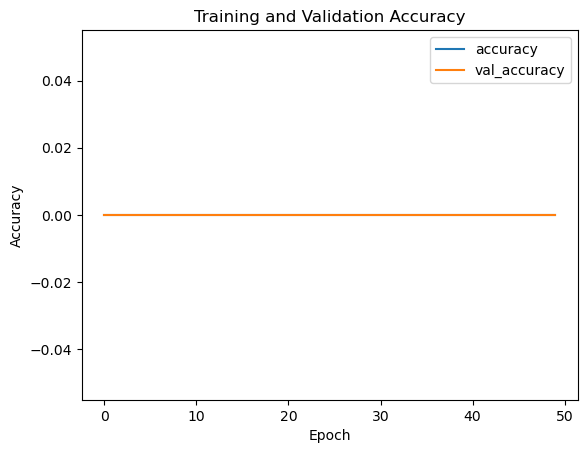

4/4 [==============================] - 0s 25ms/step


In [28]:
import pandas as pd
import yfinance as yf
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class SentimentAnalysisModel:
    def __init__(self, tickers):
        self.tickers = tickers

    def download_news_and_analyze_sentiment(self):
        sid = SentimentIntensityAnalyzer()

        ticker_list = []
        sentiment_list = []
        headlines_list = []

        for ticker in self.tickers:
            ticker_data = yf.Ticker(ticker)
            news = ticker_data.news
            
            if news:
                headlines = [headline['title'] for headline in news]
                sentiments = [sid.polarity_scores(headline)['compound'] for headline in headlines]
                avg_sentiment = sum(sentiments) / len(sentiments)
                sentiment = "Positive" if avg_sentiment > 0 else "Negative" if avg_sentiment < 0 else "Neutral"
                
                ticker_list.append(ticker)
                sentiment_list.append(sentiment)
                headlines_list.append(headlines)
            else:
                ticker_list.append(ticker)
                sentiment_list.append("Not available")
                headlines_list.append([])

        df = pd.DataFrame({
            'Ticker': ticker_list,
            'Sentiment': sentiment_list,
            'Headlines': headlines_list
        })

        return df

    def train_sentiment_model(self, df):
        X = df['Headlines']
        Y = df['Sentiment']

        label_encoder = LabelEncoder()
        Y = label_encoder.fit_transform(Y)

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        max_words = 1000
        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(X_train)
        X_train_seq = tokenizer.texts_to_sequences(X_train)
        X_test_seq = tokenizer.texts_to_sequences(X_test)

        max_length = 100
        X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
        X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

        embedding_size = 32
        model = Sequential()
        model.add(Embedding(input_dim=max_words, output_dim=embedding_size, input_length=max_length))
        model.add(LSTM(units=100))
        model.add(Dense(units=1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
        history = model.fit(X_train_pad, Y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=callbacks)

        loss, accuracy = model.evaluate(X_test_pad, Y_test)
        print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

        # Predictions on test set
        Y_pred_prob = model.predict(X_test_pad)
        Y_pred = (Y_pred_prob > 0.5).astype(int)

        # Calculate evaluation metrics
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred, average='weighted')
        recall = recall_score(Y_test, Y_pred, average='weighted')
        f1 = f1_score(Y_test, Y_pred, average='weighted')

        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

        # Plot training history
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        metrics_df = pd.DataFrame(history.history)
        metrics_df.index += 1
        metrics_df.index.name = 'Epoch'
        metrics_df.columns.name = 'Metrics'

        metrics_df['Test Loss'] = loss
        metrics_df['Test Accuracy'] = accuracy

        return model, metrics_df, tokenizer

    def predict_sentiment_score(self, model, tokenizer, df):
        max_length = 100
        X_seq = tokenizer.texts_to_sequences(df['Headlines'])
        X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post')
        sentiment_scores = model.predict(X_pad)
        scaled_sentiment_scores = (1 - sentiment_scores)
        df['Sentiment Score'] = scaled_sentiment_scores

        return df

    def adjust_stock_data(self, data, df):
        merged_dataset = pd.merge(data, df, on='Ticker', how='left')
        merged_dataset['Adj Daily Return'] = merged_dataset['Daily Return'] - merged_dataset['Sentiment Score']
        merged_dataset['Adj Risk Scores'] = merged_dataset['Risk_Scores'] + merged_dataset['Sentiment Score']

        return merged_dataset

    def save_to_excel(self, df, filename):
        df.to_excel(filename, index=False)


# List of tickers
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN',

    'MTD', 'NOW', 'ADBE', 'CRM', 'ASML', 'ORCL', 'SAP', 'INTU', 'HPE', 'IBM',
    'WMT', 'COST', 'TGT', 'AMT', 'SPG', 'PLD', 'CBRE', 'EQIX', 'WY', 'AVB', 'O', 'CCI',
    'JPM', 'BAC', 'WFC', 'GS', 'MS', 'BLK', 'SCHW', 'AXP', 'CME', 'MMC', 'SPGI', 'AIG',
    'MMM', 'CAT', 'HON', 'DHR', 'UNP', 'UPS', 'RTX', 'BA', 'LMT', 'GD', 'NOC', 'RSG',
    'CVX', 'XOM', 'COP', 'SLB', 'PSX', 'MPC', 'VLO', 'KMI', 'EPD', 'TRP', 'PXD', 'OXY',
    'JNJ', 'PFE', 'MRK', 'ABBV', 'GSK', 'NVS', 'SNY', 'AMGN', 'LLY', 'AZN', 'BIIB', 'TMO',
    'PG', 'KO', 'PEP', 'UL', 'MO', 'MDLZ', 'CL', 'KHC', 'CLX', 'GIS', 'KMB', 'K',
    'UNH', 'CI', 'HUM', 'CVS', 'HCA', 'SYK', 'BDX', 'TMO', 'ISRG', 'ILMN', 'VRTX',
    'DHR', 'AAPL', 'ADBE', 'GOOGL', 'AMZN', 'INTC', 'MSFT', 'CSCO', 'QCOM', 'NVDA',
    'SHOP', 'TSLA', 'META', 'NFLX', 'PYPL', 'UBER', 'X', 'SQ', 'SNAP', 'ROKU', 'ZM', 'DOCU',
]

# Instantiate the SentimentAnalysisModel class
sentiment_model = SentimentAnalysisModel(tickers)

# Download news and analyze sentiment
news_sentiment_df = sentiment_model.download_news_and_analyze_sentiment()

# Train sentiment analysis model
trained_model, training_metrics, trained_tokenizer = sentiment_model.train_sentiment_model(news_sentiment_df)

# Predict sentiment score for the entire dataset
predicted_sentiment_df = sentiment_model.predict_sentiment_score(trained_model, trained_tokenizer, news_sentiment_df)

# Load stock data
stock_data = pd.read_excel('stock_data_with_scores.xlsx')

# Adjust stock data based on sentiment score
adjusted_stock_data = sentiment_model.adjust_stock_data(stock_data, predicted_sentiment_df)

# Save adjusted stock data to Excel
sentiment_model.save_to_excel(adjusted_stock_data, 'stock_data_with_adjustments.xlsx')


# PORTFOLIO OPTIMIZATION AFTER SENTIMENT ADJUSTMENT

Top 5 Stocks in the Portfolio: ['UPS' 'PG' 'SLB' 'HON' 'AVB']
Buy Strategy:
Buy 19.46% of UPS
Buy 19.92% of PG
Buy 20.20% of HON
Buy 20.28% of AVB
Sell Strategy:
Portfolio Returns: 0.45642542072479664
Portfolio Volatility: 5.8651588950264015
Portfolio Shape Ratio: -0.22917577816240856


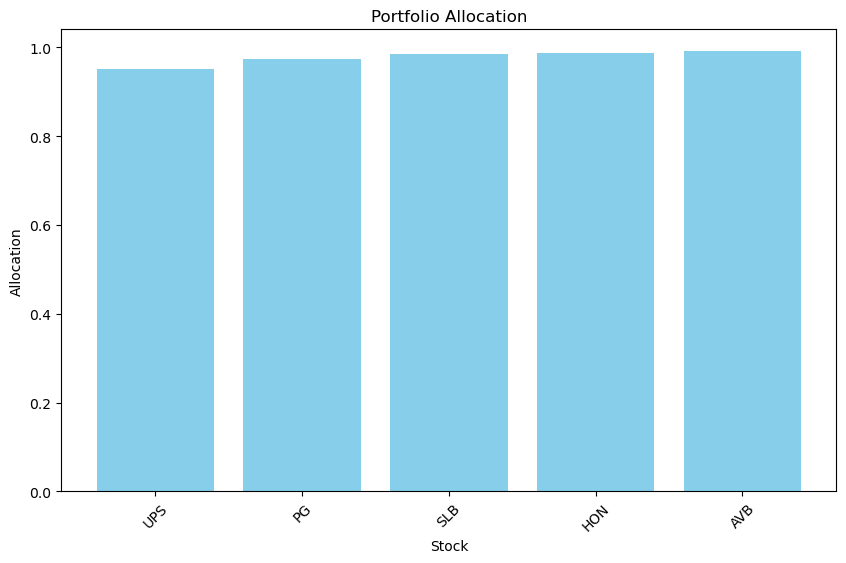

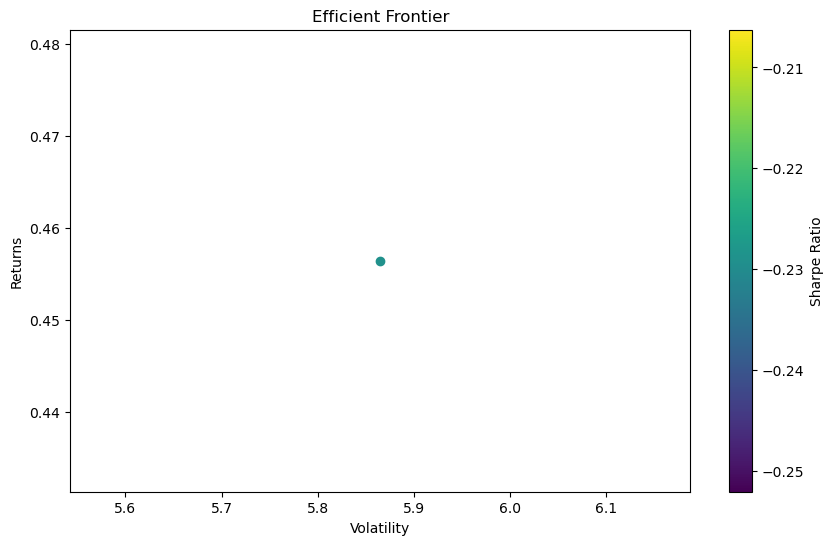

Interpretation based on standard thresholds:
Volatility is above the threshold.
Sharpe ratio is below the threshold.
Overview of Portfolio:
Drawbacks: Low Sharpe ratio.
Drawbacks: High volatility.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('stock_data_with_adjustments.xlsx')
df = df.groupby('Ticker').agg({'Adj Daily Return': 'mean', 'Adj Risk Scores': 'mean'}).reset_index()
# Normalize features
df['Adj Daily Return'] = (df['Adj Daily Return'] - df['Adj Daily Return'].mean()) / df['Adj Daily Return'].std()
df['Adj Risk Scores'] = (df['Adj Risk Scores'] - df['Adj Risk Scores'].mean()) / df['Adj Risk Scores'].std()

# Define an RL environment
class PortfolioEnvironment:
    def __init__(self, data):
        self.data = data
        self.action_space = len(data)
        self.state = np.zeros(len(data))
        self.portfolio_returns = []
        self.portfolio_volatility = []
        self.portfolio_shape_ratio = []

    def reset(self):
        self.state = np.zeros(len(data))
        self.portfolio_returns = []
        self.portfolio_volatility = []
        self.portfolio_shape_ratio = []
        return self.state

    def step(self, action):
        self.state = action
        returns = np.dot(action, self.data['Adj Daily Return'])
        volatility = np.sqrt(np.dot(action**2, self.data['Adj Risk Scores']**2))
        shape_ratio = returns / volatility
        if returns < 0:  # Ensure returns are not negative
            returns = 0
        self.portfolio_returns.append(returns)
        self.portfolio_volatility.append(volatility)
        self.portfolio_shape_ratio.append(shape_ratio)
        reward = shape_ratio
        done = len(self.portfolio_returns) >= 5  # Maximum of 5 stocks
        return self.state, reward, done, {}

    def get_portfolio_metrics(self):
        return np.mean(self.portfolio_returns), np.mean(self.portfolio_volatility), np.mean(self.portfolio_shape_ratio)

    # Define RL environment
    env = PortfolioEnvironment(df)

    # Training loop (random policy for demonstration)
    state = env.reset()
    for _ in range(1000):  # Train for 1000 episodes
        action = np.random.rand(len(df))  # Random policy
        next_state, reward, done, _ = env.step(action)
        if done:
            break

    # Get top 5 stocks in the portfolio
    top_5_indices = np.argsort(action)[-5:]
    top_5_stocks = df.loc[top_5_indices]['Ticker'].values
    print("Top 5 Stocks in the Portfolio:", top_5_stocks)

    # Calculate total value of portfolio (initially set to 1 for simplicity)
    total_value = 1.0

    # Calculate the percentage of each stock in the portfolio
    allocation_percentages = action[top_5_indices] / np.sum(action[top_5_indices])

    # Buy and sell strategy based on volatility and Sharpe ratio thresholds for selected 5 stocks
    volatility_threshold = np.percentile(env.portfolio_volatility, 25)
    sharpe_ratio_threshold = np.percentile(env.portfolio_shape_ratio, 75)

    selected_stocks_action = action[top_5_indices]
    selected_stocks_volatility = df['Adj Risk Scores'][top_5_indices]
    selected_stocks_sharpe_ratio = df['Adj Daily Return'][top_5_indices] / selected_stocks_volatility

    buy_indices = np.where((selected_stocks_volatility < volatility_threshold) & (selected_stocks_sharpe_ratio > sharpe_ratio_threshold))[0]
    sell_indices = np.where((selected_stocks_volatility > volatility_threshold) & (selected_stocks_sharpe_ratio < sharpe_ratio_threshold))[0]

    print("Buy Strategy:")
    for i in buy_indices:
        stock = df.loc[top_5_indices[i], 'Ticker']
        percentage_to_buy = allocation_percentages[i] * total_value
        print(f"Buy {percentage_to_buy:.2%} of {stock}")

    print("Sell Strategy:")
    for i in sell_indices:
        stock = df.loc[top_5_indices[i], 'Ticker']
        percentage_to_sell = allocation_percentages[i] * total_value
        print(f"Sell {percentage_to_sell:.2%} of {stock}")

# Print portfolio metrics
portfolio_returns, portfolio_volatility, portfolio_shape_ratio = env.get_portfolio_metrics()
print("Portfolio Returns:", portfolio_returns)  # Comment on returns
print("Portfolio Volatility:", portfolio_volatility)
print("Portfolio Shape Ratio:", portfolio_shape_ratio)

# Plot portfolio allocation
plt.figure(figsize=(10, 6))
plt.bar(df['Ticker'][top_5_indices], action[top_5_indices], color='skyblue')
plt.title('Portfolio Allocation')
plt.xlabel('Stock')
plt.ylabel('Allocation')
plt.xticks(rotation=45)
plt.show()

# Efficient frontier plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_shape_ratio, cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Interpretation based on standard thresholds
print("Interpretation based on standard thresholds:")
if portfolio_volatility < volatility_threshold:
    print("Volatility is below the threshold.")
else:
    print("Volatility is above the threshold.")

if portfolio_shape_ratio > sharpe_ratio_threshold:
    print("Sharpe ratio is above the threshold.")
else:
    print("Sharpe ratio is below the threshold.")

# Overview of the portfolio advantages and drawbacks
print("Overview of Portfolio:")
if portfolio_shape_ratio > sharpe_ratio_threshold:
    print("Advantages: High Sharpe ratio.")
else:
    print("Drawbacks: Low Sharpe ratio.")

if portfolio_volatility < volatility_threshold:
    print("Advantages: Low volatility.")
else:
    print("Drawbacks: High volatility.")


# PERSONALIZED RECOMMENDATION

In [30]:
# Personalized recommendation based on portfolio optimization results
personalized_recommendations = []

# Consider assets to invest based on risk tolerance, returns, and sentiment impact
for i, stock in enumerate(top_5_stocks):
    recommendation = f"For {stock}: "
    
    # Check returns
    if portfolio_returns > 0:
        recommendation += f"The portfolio has shown positive returns, indicating potential growth opportunities. Consider increasing exposure to {stock}. "
    else:
        recommendation += f"Although the portfolio returns are currently neutral, {stock} remains a stable option. Monitor for potential growth opportunities. "

    # Calculate % to buy or sell based on allocation percentages
    if i in buy_indices:
        percentage_to_trade = allocation_percentages[i] * total_value
        recommendation += f"To capitalize on positive sentiment and potential returns, consider buying {percentage_to_trade:.2%} of {stock}. "
    elif i in sell_indices:
        percentage_to_trade = allocation_percentages[i] * total_value
        recommendation += f"To manage risk and optimize the portfolio, consider selling {percentage_to_trade:.2%} of {stock}. "

    # Check Sharpe ratio
    if portfolio_shape_ratio > sharpe_ratio_threshold:
        recommendation += f"The Sharpe ratio of the portfolio is favorable, suggesting good risk-adjusted returns. {stock} could contribute positively to the portfolio's performance. "
    else:
        recommendation += f"The Sharpe ratio of the portfolio is relatively low, indicating higher risk. Exercise caution with {stock} and monitor for potential volatility. "

    personalized_recommendations.append(recommendation)

# Print personalized recommendations
print("Personalized Recommendations:")
for recommendation in personalized_recommendations:
    print(recommendation)


Personalized Recommendations:
For UPS: The portfolio has shown positive returns, indicating potential growth opportunities. Consider increasing exposure to UPS. To capitalize on positive sentiment and potential returns, consider buying 19.46% of UPS. The Sharpe ratio of the portfolio is relatively low, indicating higher risk. Exercise caution with UPS and monitor for potential volatility. 
For PG: The portfolio has shown positive returns, indicating potential growth opportunities. Consider increasing exposure to PG. To capitalize on positive sentiment and potential returns, consider buying 19.92% of PG. The Sharpe ratio of the portfolio is relatively low, indicating higher risk. Exercise caution with PG and monitor for potential volatility. 
For SLB: The portfolio has shown positive returns, indicating potential growth opportunities. Consider increasing exposure to SLB. The Sharpe ratio of the portfolio is relatively low, indicating higher risk. Exercise caution with SLB and monitor fo